# Solve the heat equation explicitly and with the Euler algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load necessary files
from PDE_Solver.solver import explicit_euler, parameters
from PDE_Solver.utils import plot_solution

# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load parameters
params = parameters.Parameters()

In [4]:
def apply_euler_algorithm(parameters):
    # Initialize output array
    u_euler = explicit_euler.initialize_output(params)
    
    # Create grid
    x, t = explicit_euler.create_grid(params)
    
    # Apply initial conditions
    u_euler = explicit_euler.define_initial_conditions(u_euler)
    # Apply boundary conditions
    u_euler = explicit_euler.define_boundary_conditions(u_euler, x)
    # Perform Euler algorithm
    u_euler = explicit_euler.perform_euler_algorithm(u_euler, params)
    
    return x, t, u_euler

In [5]:
# Set dx to 1 cm
params.dx = 1/100

# EULER SOLUTION
x_1_dx, t_1_dx, u_euler_1_dx = apply_euler_algorithm(params)

# EXPLICIT SOLUTION
u_explicit_1_dx = explicit_euler.initialize_output(params)
u_explicit_1_dx = explicit_euler.explicit_solution(u_explicit_1_dx, x_1_dx, t_1_dx, params)

In [6]:
# Set dx to 10 cm
params.dx = 1/10

# EULER SOLUTION
x_10_dx, t_10_dx, u_euler_10_dx = apply_euler_algorithm(params)

# EXPLICIT SOLUTION
u_explicit_10_dx = explicit_euler.initialize_output(params)
u_explicit_10_dx = explicit_euler.explicit_solution(u_explicit_10_dx, x_10_dx, t_10_dx, params)

Text(0.5, 1.0, 'EXPLICIT: u, dx = 10cm')

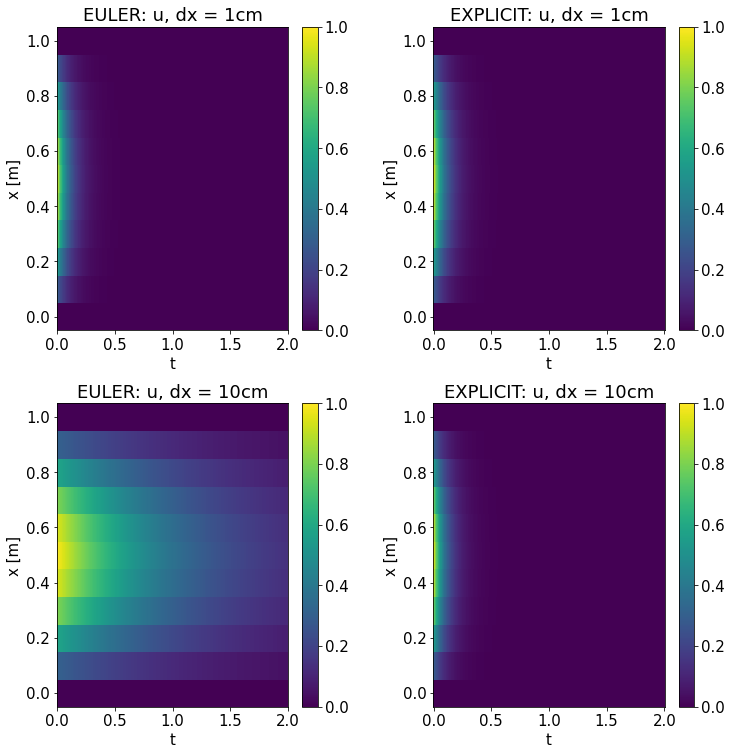

In [7]:
%matplotlib inline

# Plot solutions

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(2,2, figsize=(10, 10))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

plt_u_euler_1_dx = axs[0,0].pcolor(t_1_dx, x_1_dx, u_euler_1_dx, shading='auto')
axs[0,0].set_xlabel('t')
axs[0,0].set_ylabel('x [m]')
fig.colorbar(plt_u_euler_1_dx, ax=axs[0,0])
axs[0,0].set_title('EULER: u, dx = 1cm')

plt_u_explicit_1_dx = axs[0,1].pcolor(t_1_dx, x_1_dx, u_explicit_1_dx, shading='auto')
axs[0,1].set_xlabel('t')
axs[0,1].set_ylabel('x [m]')
fig.colorbar(plt_u_explicit_1_dx, ax=axs[0,1])
axs[0,1].set_title('EXPLICIT: u, dx = 1cm')

plt_u_euler_10_dx = axs[1,0].pcolor(t_10_dx, x_10_dx, u_euler_10_dx, shading='auto')
axs[1,0].set_xlabel('t')
axs[1,0].set_ylabel('x [m]')
fig.colorbar(plt_u_euler_10_dx, ax=axs[1,0])
axs[1,0].set_title('EULER: u, dx = 10cm')

plt_u_explicit_10_dx = axs[1,1].pcolor(t_10_dx, x_10_dx, u_explicit_10_dx, shading='auto')
axs[1,1].set_xlabel('t')
axs[1,1].set_ylabel('x [m]')
fig.colorbar(plt_u_explicit_10_dx, ax=axs[1,1])
axs[1,1].set_title('EXPLICIT: u, dx = 10cm')

In [8]:
# ERROR
error_1_dx = u_explicit_1_dx - u_euler_1_dx
error_10_dx = u_explicit_10_dx - u_euler_10_dx

Text(0.5, 1.0, 'ERROR, dx = 10cm')

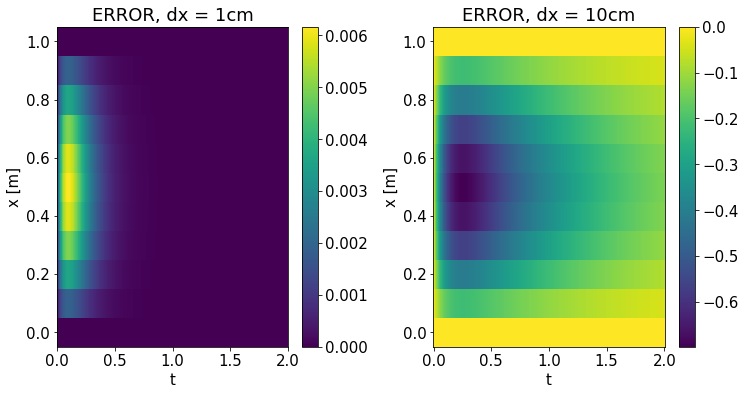

In [9]:
%matplotlib inline

# Plot errors

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1,2, figsize=(10, 5))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

plt_error_1_dx = axs[0].pcolor(t_1_dx, x_1_dx, error_1_dx, shading='auto')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x [m]')
fig.colorbar(plt_error_1_dx, ax=axs[0])
axs[0].set_title('ERROR, dx = 1cm')

plt_error_10_dx = axs[1].pcolor(t_10_dx, x_10_dx, error_10_dx, shading='auto')
axs[1].set_xlabel('t')
axs[1].set_ylabel('x [m]')
fig.colorbar(plt_error_10_dx, ax=axs[1])
axs[1].set_title('ERROR, dx = 10cm')

##  Solution at two time points

Study the solutions at two time points $t_1$ and $t_2$ where $u(x, t_1)$ is smooth but still significantly curved and $u(x,t_2)$ is almost linear, close to the stationary state.

In [23]:
t1 = np.where(t_1_dx == 0.1)[0]
u_euler_1_dx_t1 = u_euler_1_dx[:,t1]
u_explicit_1_dx_t1 = u_explicit_1_dx[:,t1]

t2 = np.where(t_1_dx == 1.0)[0]
u_euler_1_dx_t2 = u_euler_1_dx[:,t2]
u_explicit_1_dx_t2 = u_explicit_1_dx[:,t2]

Text(0.5, 1.0, '$t = t_2$')

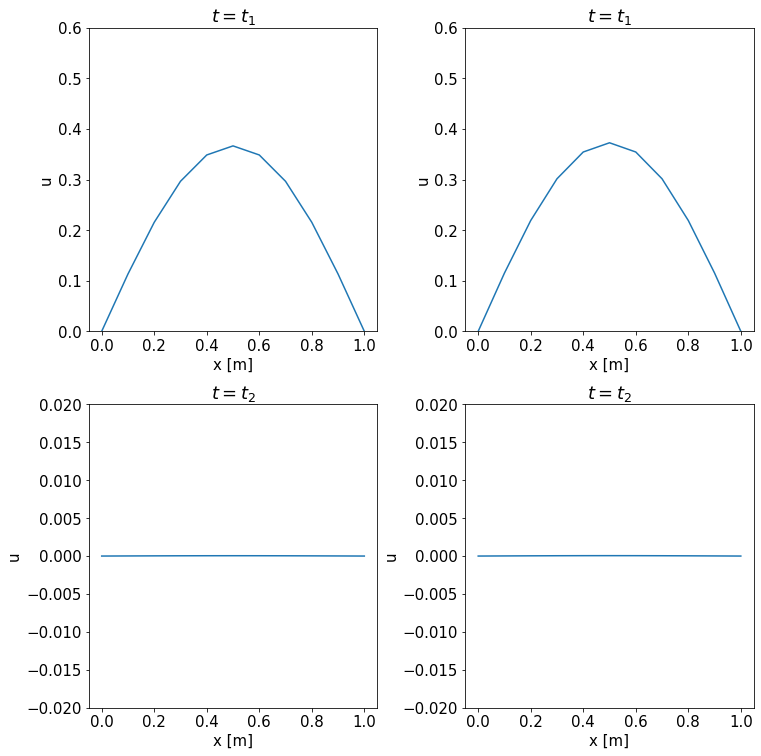

In [27]:
%matplotlib inline
plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

axs[0,0].plot(x_1_dx, u_euler_1_dx_t1)
axs[0,0].set_xlabel('x [m]')
axs[0,0].set_ylabel('u')
axs[0,0].set_ylim(0,0.6)
axs[0,0].set_title(r'$t = t_1$')

axs[0,1].plot(x_1_dx, u_explicit_1_dx_t1)
axs[0,1].set_xlabel('x [m]')
axs[0,1].set_ylabel('u')
axs[0,1].set_ylim(0,0.6)
axs[0,1].set_title(r'$t = t_1$')

axs[1,0].plot(x_1_dx, u_euler_1_dx_t2)
axs[1,0].set_xlabel('x [m]')
axs[1,0].set_ylabel('u')
axs[1,0].set_ylim(-0.02,0.02)
axs[1,0].set_title(r'$t = t_2$')

axs[1,1].plot(x_1_dx, u_explicit_1_dx_t2)
axs[1,1].set_xlabel('x [m]')
axs[1,1].set_ylabel('u')
axs[1,1].set_ylim(-0.02,0.02)
axs[1,1].set_title(r'$t = t_2$')